In [18]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')
#library for dataframe and vizualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as style
import seaborn as sns
#Modeling Library
from sklearn.preprocessing import StandardScaler,MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
df.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# checking for missing values of each column
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# checking for duplicates
print( sum(df.duplicated()))

0


Text(0.5, 1.0, 'Weekly_Sales')

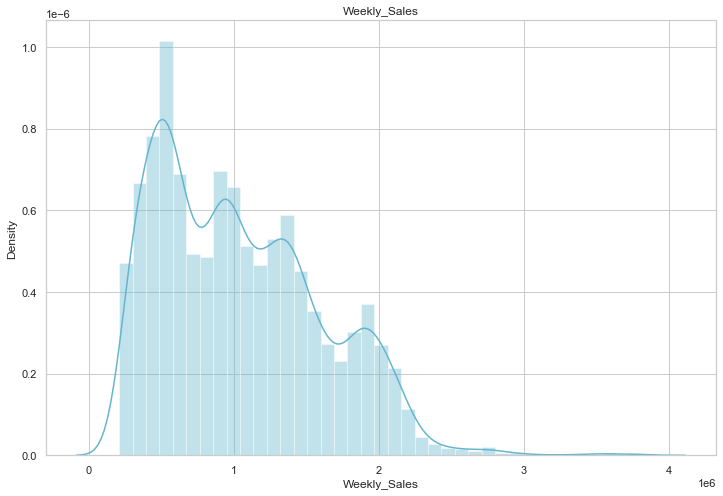

In [9]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['Weekly_Sales'], kde = True, color = 'c')
plt.title('Weekly_Sales')

In [12]:
import seaborn as sns
df_marketsize = df.groupby(['Holiday_Flag', 'Weekly_Sales']).size().to_frame().reset_index()
df_marketsize.rename(columns={0: 'n_promo'}, inplace=True)

plt.figure(figsize=(,5))
ax = sns.barplot(x='Holiday_Flag', y='n_promo',hue='Weekly_Sales', data=df_marketsize)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of Weekly_sale by holiday flag")
plt.xlabel("Holiday Flag")
plt.ylabel("Weekly Sales")
plt.show()

KeyboardInterrupt: 

In [13]:
plt.figure(figsize=(3,3))
style.use('svg')
sns.countplot(x='Weekly_Sales',data=df)
plt.title('Weekly Sales distribution')
plt.show   

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D56C4FD0D0> (for post_execute):


KeyboardInterrupt: 

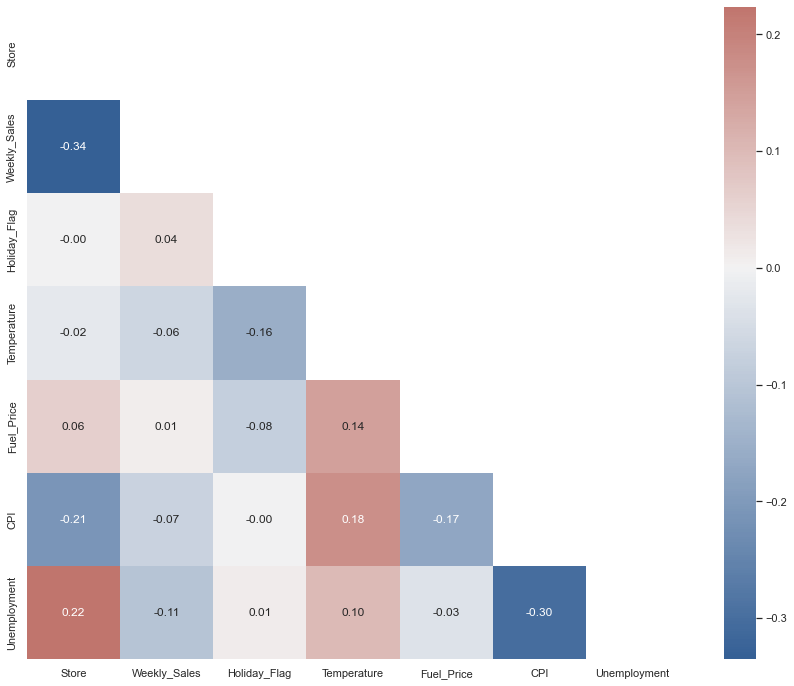

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Calculate pairwise-correlation
matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show();

Text(0.5, 1.0, 'Holiday_Flag vs Weekly_Sales')

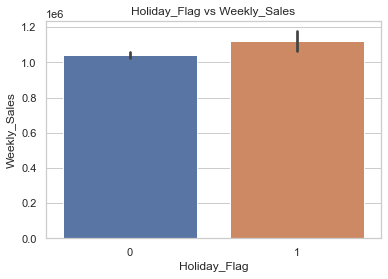

In [ ]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
plt.title('Holiday_Flag vs Weekly_Sales')

Text(0.5, 1.0, 'Temperature vs Weekly_Sales')

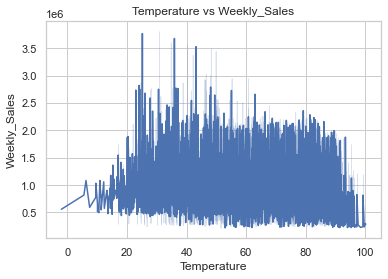

In [20]:
sns.lineplot(x='Temperature',y='Weekly_Sales',data=df)
plt.title('Temperature vs Weekly_Sales')

Text(0.5, 1.0, 'Unemployment vs Weekly_Sales')

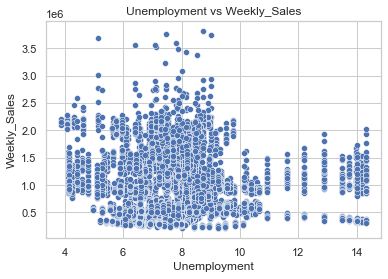

In [21]:
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=df)
plt.title('Unemployment vs Weekly_Sales')

Text(0.5, 1.0, 'Date vs Weekly_Sales')

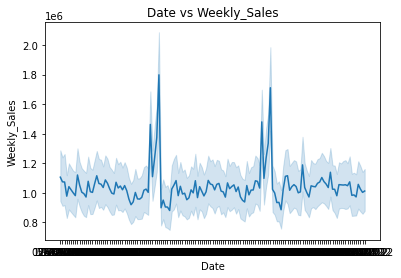

In [5]:
sns.lineplot(x='Date',y='Weekly_Sales',data=df)
plt.title('Date vs Weekly_Sales')

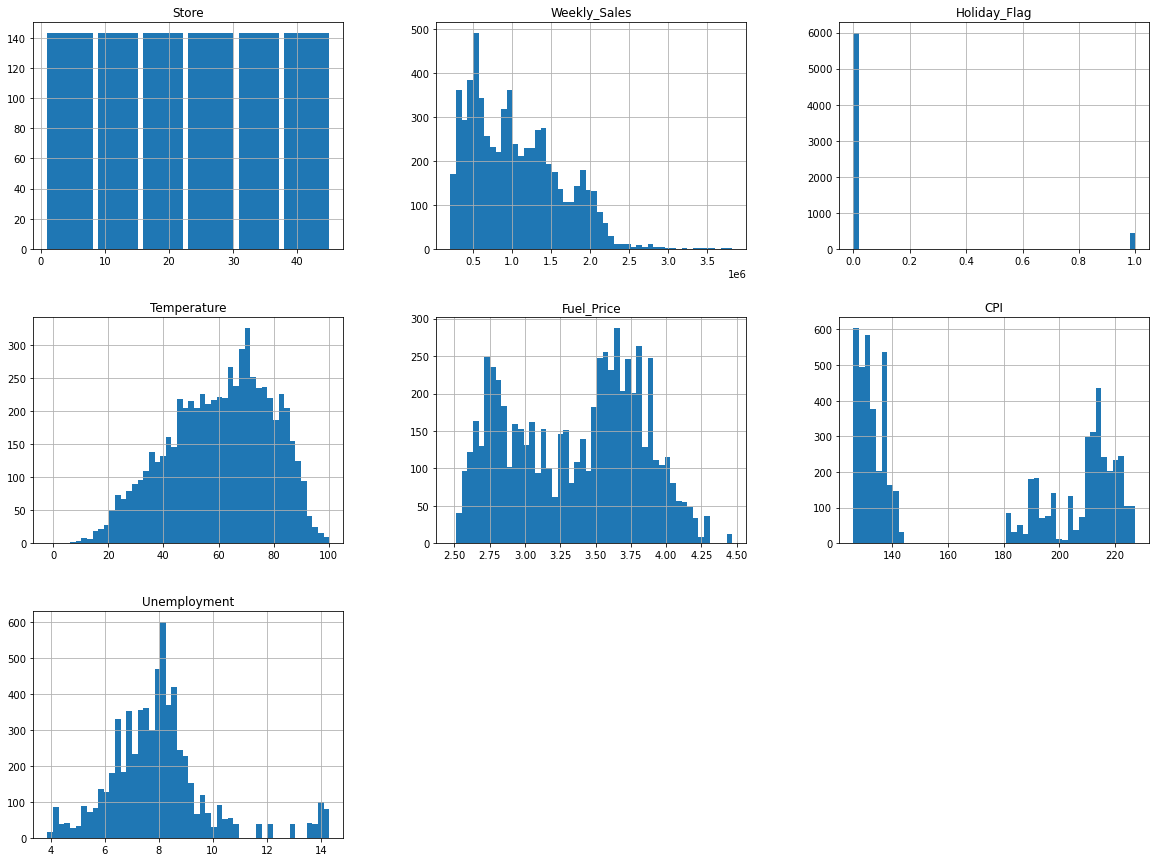

In [9]:
%matplotlib inline 
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [10]:
correlations = df.corr()
correlations

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


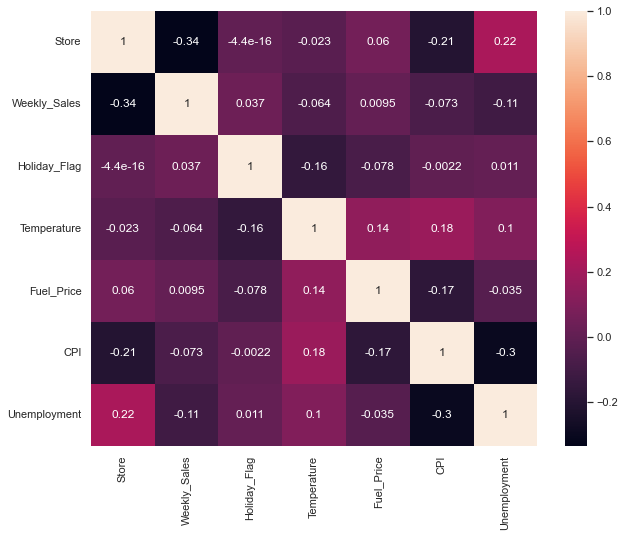

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show() #lighter values indicate strong relationship whereas darker values indicate weak relation.
           #and so we can drop it.

# Linear Regression

In [22]:
X= df.drop(['Weekly_Sales','Holiday_Flag'],axis=1)
y= df.Holiday_Flag

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_train shape',y_test.shape)

X_train shape (4504, 6)
X_test shape (1931, 6)
y_train shape (4504,)
y_train shape (1931,)


In [24]:
X_train

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
1288,10,12-02-2010,49.96,2.828,126.496258,9.765
1115,8,13-04-2012,65.19,3.891,225.062571,5.679
582,5,16-04-2010,65.30,2.808,211.038853,6.465
3647,26,24-06-2011,56.94,3.851,135.265267,7.818
1564,11,31-08-2012,86.49,3.638,225.829306,6.334
...,...,...,...,...,...,...
3772,27,18-02-2011,39.32,3.420,137.251185,7.827
5191,37,03-12-2010,54.44,2.708,210.376263,8.476
5226,37,05-08-2011,86.71,3.684,214.297294,8.177
5390,38,30-12-2011,44.64,3.428,130.071032,12.890


In [25]:
columns = X_train.columns.to_list()

In [26]:
#list for cols to scale
cols_to_scale = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

scaler= StandardScaler()
scaler.fit(X_train[cols_to_scale])

# if you want to include date
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[cols_to_scale]= scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale]= scaler.transform(X_test[cols_to_scale])

# If you dont want to include date
# X_train_scaled= scaler.transform(X_train[cols_to_scale])
# X_test_scaled= scaler.transform(X_test[cols_to_scale])

In [27]:
X_train_scaled

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
1288,-1.011475,12-02-2010,-0.567131,-1.165268,-1.151924,0.938433
1115,-1.165355,13-04-2012,0.259173,1.157092,1.361419,-1.238631
582,-1.396174,16-04-2010,0.265141,-1.208963,1.003828,-0.819842
3647,0.219562,24-06-2011,-0.188431,1.069703,-0.928323,-0.098949
1564,-0.934535,31-08-2012,1.414805,0.604357,1.380970,-0.889640
...,...,...,...,...,...,...
3772,0.296502,18-02-2011,-1.144405,0.128088,-0.877684,-0.094154
5191,1.065900,03-12-2010,-0.324069,-1.427435,0.986933,0.251640
5226,1.065900,05-08-2011,1.426741,0.704854,1.086915,0.092330
5390,1.142840,30-12-2011,-0.855768,0.145565,-1.060771,2.603466


In [ ]:
X_train_scaled